<a href="https://colab.research.google.com/github/Olivewind-Sejong/About-NLP/blob/main/Last_Task_v_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2023-04-11 07:30:33--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2023-04-11 07:30:35--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf9a9fd6e579e8994cba5431904.dl.dropboxusercontent.com/cd/0/get/B5-XJbs4OndgSjnfM0pVD21p9VdckmM3Y9_UZ1JmfX4JGmVpEhsxs-GqvLD2FMgj7SFaAhvjzoZ6zlViedsTPcpAGeW_LeoxZ5FzRM83cKLf2AwHuYKIKXIB1lZFaYQklkQtwVcDiwZBEnnLbKKQnJCxJNSgYdoRTtIQ-qTEutSLk_oKfzFNERj1kNJ25y1BmB8/file?dl=1# [following]
--2023-04-11 07:30:35--  https://ucf9a9fd6e579e8994cba5431904.dl.dropboxusercontent.com/cd/0/get/B5-XJbs4O

In [3]:
import os
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer

folder_path = "/content/good"  # 폴더 경로 설정
file_list = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]  # 폴더 내 파일 목록 가져오기

corpus1 = []  # 모든 파일의 내용을 저장할 리스트
okt = Okt()  # Okt 객체 생성
stop_words = ['하였다', '하다', '2022', '2022년', '겨울']  # 불용어 사전 지정
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)  # 파일 경로 설정
    with open(file_path, 'r', encoding='cp949') as f:
        content = f.read()  # 파일 내용 읽기
        tokens = okt.pos(content, stem=True)  # 형태소 분석 결과를 토큰 리스트로 저장
        tokens = [word for word, pos in tokens if pos not in ['Josa', 'Eomi', 'Adverb']]  # 조사, 어미, 부사 제거
        tokens = [word for word in tokens if word not in stop_words]  # 불용어 제거
        corpus1.append(' '.join(tokens))  # 공백으로 토큰을 이어 붙인 뒤 리스트에 추가

vectorizer = CountVectorizer(stop_words=stop_words)  # CountVectorizer 객체 생성
dtm1 = vectorizer.fit_transform(corpus1)  # DTM 생성

word_count1 = dict(zip(vectorizer.get_feature_names_out(), dtm1.sum(axis=0).tolist()[0]))  # 각 단어의 빈도수를 계산하여 딕셔너리에 저장
sorted_word_count1 = sorted(word_count1.items(), key=lambda x: x[1], reverse=True)  # 빈도수를 기준으로 내림차순 정렬

for i in range(20):
    print(f"{sorted_word_count1[i][0]} : {sorted_word_count1[i][1]}")

word_features1 = sorted_word_count1[:20]
vocab1 = [word for word, count in sorted_word_count1[:20]]

print(len(sorted_word_count1))
print(len(word_features1))

시위 : 239
장애인 : 197
있다 : 131
장연 : 126
되다 : 87
지하철 : 81
시민 : 78
동권 : 62
않다 : 57
보장 : 50
피해 : 50
권리 : 47
사회 : 47
방식 : 44
정부 : 44
대한 : 40
없다 : 36
요구 : 36
진행 : 35
되어다 : 33
1260
20


In [4]:
import string
word_list_1 = content.translate(str.maketrans('', '', string.punctuation)).split()

unique_words_1 = set(word_list_1)
print("사용된 단어의 수 : ", len(unique_words_1))

사용된 단어의 수 :  286


In [32]:
print(corpus1)

['\t 요즘 유튜브 페이스북 등 대중매체 장애인 이 동권 보장 위해 시위 ‘ 전국 장애인 차별 철폐 연대 ’ 의 소식 자주 접 수 있다 . 그 들 시위 시민 출퇴근길 가로막다 많다 불만 초래 . 하지만 전 장연 시위 시민 들 장애인 열악하다 생활환경 대해 관심 가지 중요하다 사건 이자 의견 전달 수 있다 유일하다 수단 이다 . 전 장연 시위 목적 , 정당성 시위 사회 미치다 수 있다 영향 대해 논 . \n\t 먼저 , 현재 장애인 이 동권 충분하다 보장 받다 못 점 시위 목적 타당 . ‘ 장애인 이 동권 보장 위 17 개 시도 별 교통 수단 정책 분석 ( 2018 )’ 대부분 지역 밉다 발달 보편 정책 우선 모형 채택 있다 . 당연하다 , ‘ 2020 장애인 실태 조사 ’ 의 결과 교통 수단 이용 시 어려움 느끼다 장애인 비율 39.8% 로 , 2017년 이후 계속 증가 있다 . 장애인 이 동권 교통 약 자법 정의 이르다 보장 것 의무 화 있다 . 하지만 이 예산 부족 등 이유 시행 되다 않다 묵인 되다 것 현실 . 장애인 기본권 충분하다 보장 받다 못 점 이다 위헌 , 시위 목적 대한 정당성 부여 되다 . \n\t 또한 , 전 장연 시위 방식 정당하다 . 전 장연 시위 장애인 이 동권 대한 사안 수면 위로 떠오르다 이유 무엇 이다 ? 바로 보다 시위 교통 수단 운행 방해 형태 운영 되어다 , 비장 애인 삶 직접 적 영향 끼치다 때문 . 시위 때문 불편 겪다 시민 시위 교통 방해 죄 저촉 되다 수 있다 주장 . 장애인 이 동권 장애인 기본권 중 하나 로써 , 헌법 제 10조 에 의하다 국가 이르다 보장 의무 명시 있다 . 또한 , 이 시위 목적 달성 위 어떠하다 폭력 행사 없다 사실 , ‘ 집회 및 시위 관 법률 ’ 위반 않다 정당하다 시 위임 주장 . 때문 국가 장애인 이 동권 보장 시위 탄압 것 아니다 , 장애인 이 동권 보장 위 법적 장치 마련 . 마지막 , 전 장연 시위 장애 사회 적 인식 증진 공익 행위 . ‘ 장애인 지하철 시위 대한 인식 ’ 온라

In [5]:
type(word_features1)

list

In [6]:
print(word_features1)

[('시위', 239), ('장애인', 197), ('있다', 131), ('장연', 126), ('되다', 87), ('지하철', 81), ('시민', 78), ('동권', 62), ('않다', 57), ('보장', 50), ('피해', 50), ('권리', 47), ('사회', 47), ('방식', 44), ('정부', 44), ('대한', 40), ('없다', 36), ('요구', 36), ('진행', 35), ('되어다', 33)]


In [7]:
type(sorted_word_count1)

list

In [8]:
print(sorted_word_count1)

[('시위', 239), ('장애인', 197), ('있다', 131), ('장연', 126), ('되다', 87), ('지하철', 81), ('시민', 78), ('동권', 62), ('않다', 57), ('보장', 50), ('피해', 50), ('권리', 47), ('사회', 47), ('방식', 44), ('정부', 44), ('대한', 40), ('없다', 36), ('요구', 36), ('진행', 35), ('되어다', 33), ('사람', 32), ('교통', 31), ('받다', 31), ('예산', 31), ('주장', 30), ('차별', 29), ('문제', 27), ('아니다', 26), ('많다', 24), ('이다', 24), ('다른', 22), ('보다', 22), ('전국', 22), ('철폐', 22), ('해결', 22), ('대해', 20), ('연대', 20), ('또한', 19), ('수단', 19), ('이용', 18), ('정당하다', 18), ('방해', 17), ('운행', 17), ('인식', 17), ('주다', 17), ('관심', 16), ('그러나', 16), ('방법', 16), ('정책', 16), ('불법', 15), ('비장', 15), ('애인', 15), ('관련', 14), ('시간대', 14), ('우리', 14), ('이동', 14), ('하지만', 14), ('따르다', 13), ('때문', 13), ('무고', 13), ('불편', 13), ('실제', 13), ('위해', 13), ('인하다', 13), ('자신', 13), ('출근', 13), ('출근길', 13), ('가다', 12), ('개선', 12), ('다수', 12), ('단체', 12), ('크다', 12), ('대상', 11), ('목적', 11), ('사실', 11), ('시간', 11), ('시키다', 11), ('의견', 11), ('필요하다', 11), ('휠체어', 11), ('국민', 10), ('노력', 

In [9]:
type(dtm1)

scipy.sparse._csr.csr_matrix

In [10]:
print(dtm1)

  (0, 794)	1
  (0, 825)	1
  (0, 1154)	1
  (0, 310)	1
  (0, 926)	21
  (0, 330)	11
  (0, 513)	11
  (0, 818)	2
  (0, 680)	22
  (0, 941)	1
  (0, 1066)	1
  (0, 1083)	1
  (0, 757)	1
  (0, 637)	1
  (0, 915)	1
  (0, 902)	11
  (0, 673)	4
  (0, 1104)	1
  (0, 64)	1
  (0, 381)	1
  (0, 544)	1
  (0, 1086)	1
  (0, 1188)	2
  (0, 927)	7
  (0, 758)	1
  :	:
  (14, 919)	1
  (14, 422)	3
  (14, 295)	2
  (14, 1149)	3
  (14, 1093)	1
  (14, 130)	1
  (14, 987)	1
  (14, 623)	1
  (14, 206)	1
  (14, 907)	1
  (14, 560)	3
  (14, 393)	3
  (14, 124)	1
  (14, 1207)	2
  (14, 431)	1
  (14, 894)	1
  (14, 1134)	1
  (14, 601)	1
  (14, 1186)	1
  (14, 367)	1
  (14, 923)	2
  (14, 1082)	1
  (14, 251)	1
  (14, 940)	1
  (14, 449)	1


In [11]:
import os
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer

folder_path = "/content/normal"  # 폴더 경로 설정
file_list = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]  # 폴더 내 파일 목록 가져오기
# 파일 경로 생성 -> 파일이 있는지 검사 -> 파일이 있다면, 파일 이름을 요소로 하는 리스트 생성

corpus2 = []  # 모든 파일의 내용을 저장할 리스트
okt = Okt()  # Okt 객체 생성
stop_words = ['하였다', '하다', '2022', '2022년', '겨울']  # 불용어 사전 지정
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)  # 파일 경로 설정
    with open(file_path, 'r', encoding='cp949') as f:
        content = f.read()  # 파일 내용 읽기
        tokens = okt.pos(content, stem=True)  # 형태소 분석 결과를 토큰 리스트로 저장
        tokens = [word for word, pos in tokens if pos not in ['Josa', 'Eomi', 'Adverb']]  # 조사, 어미, 부사 제거
        tokens = [word for word in tokens if word not in stop_words]  # 불용어 제거
        corpus2.append(' '.join(tokens))  # 공백으로 토큰을 이어 붙인 뒤 리스트에 추가

vectorizer = CountVectorizer(stop_words=stop_words)  # CountVectorizer 객체 생성
dtm2 = vectorizer.fit_transform(corpus2)  # DTM 생성

word_count2 = dict(zip(vectorizer.get_feature_names_out(), dtm2.sum(axis=0).tolist()[0]))  # 각 단어의 빈도수를 계산하여 딕셔너리에 저장
sorted_word_count2 = sorted(word_count2.items(), key=lambda x: x[1], reverse=True)  # 빈도수를 기준으로 내림차순 정렬

for i in range(20):
    print(f"{sorted_word_count2[i][0]} : {sorted_word_count2[i][1]}")

word_features2 = sorted_word_count2[:20]
vocab2 = [word for word, count in sorted_word_count2[:20]]

print(len(sorted_word_count2))
print(len(word_features2))

print(sorted_word_count2)

시위 : 445
장애인 : 297
장연 : 239
있다 : 229
지하철 : 221
되다 : 147
시민 : 143
동권 : 118
않다 : 116
사람 : 97
권리 : 92
보장 : 90
피해 : 76
받다 : 67
출근길 : 65
문제 : 60
없다 : 59
방식 : 55
이다 : 55
진행 : 52
1489
20
[('시위', 445), ('장애인', 297), ('장연', 239), ('있다', 229), ('지하철', 221), ('되다', 147), ('시민', 143), ('동권', 118), ('않다', 116), ('사람', 97), ('권리', 92), ('보장', 90), ('피해', 76), ('받다', 67), ('출근길', 65), ('문제', 60), ('없다', 59), ('방식', 55), ('이다', 55), ('진행', 52), ('교통', 50), ('사회', 50), ('인하다', 50), ('정부', 48), ('대한', 47), ('위해', 47), ('주장', 47), ('되어다', 45), ('아니다', 45), ('다른', 44), ('많다', 43), ('정당하다', 41), ('관심', 40), ('방해', 40), ('하지만', 40), ('방법', 38), ('이용', 37), ('인식', 37), ('때문', 36), ('요구', 36), ('현재', 33), ('생각', 32), ('지연', 32), ('대해', 29), ('목적', 29), ('자신', 29), ('상황', 28), ('휠체어', 28), ('단체', 27), ('차별', 27), ('해결', 27), ('또한', 26), ('시간', 26), ('시키다', 26), ('출근', 26), ('예산', 25), ('운행', 25), ('의견', 25), ('전국', 25), ('침해', 25), ('행위', 25), ('약자', 24), ('용인', 24), ('철폐', 23), ('발생', 22), ('부정', 22), ('일반', 

In [12]:
import string
word_list_2 = content.translate(str.maketrans('', '', string.punctuation)).split()

unique_words_2 = set(word_list_2)
print("사용된 단어의 수 : ", len(unique_words_2))

사용된 단어의 수 :  235


In [13]:
# type(sorted_word_count2)
# type(word_features2)
print(word_features2)

[('시위', 445), ('장애인', 297), ('장연', 239), ('있다', 229), ('지하철', 221), ('되다', 147), ('시민', 143), ('동권', 118), ('않다', 116), ('사람', 97), ('권리', 92), ('보장', 90), ('피해', 76), ('받다', 67), ('출근길', 65), ('문제', 60), ('없다', 59), ('방식', 55), ('이다', 55), ('진행', 52)]


In [14]:
print(vocab2)
type(vocab2)

['시위', '장애인', '장연', '있다', '지하철', '되다', '시민', '동권', '않다', '사람', '권리', '보장', '피해', '받다', '출근길', '문제', '없다', '방식', '이다', '진행']


list

In [15]:
print(dtm2)

  (0, 1103)	1
  (0, 1085)	16
  (0, 1244)	1
  (0, 1271)	1
  (0, 894)	1
  (0, 1086)	21
  (0, 1298)	6
  (0, 1219)	8
  (0, 1328)	1
  (0, 790)	16
  (0, 270)	2
  (0, 538)	1
  (0, 406)	10
  (0, 1055)	9
  (0, 932)	4
  (0, 398)	6
  (0, 592)	4
  (0, 788)	1
  (0, 1210)	2
  (0, 1352)	1
  (0, 188)	1
  (0, 990)	1
  (0, 905)	5
  (0, 1362)	2
  (0, 922)	1
  :	:
  (23, 225)	1
  (23, 632)	1
  (23, 324)	1
  (23, 549)	2
  (23, 1001)	1
  (23, 1400)	1
  (23, 991)	1
  (23, 123)	2
  (23, 558)	1
  (23, 20)	3
  (23, 174)	1
  (23, 1371)	1
  (23, 68)	1
  (23, 57)	1
  (23, 265)	1
  (23, 850)	1
  (23, 1367)	2
  (23, 268)	2
  (23, 960)	1
  (23, 1067)	1
  (23, 868)	1
  (23, 1289)	1
  (23, 778)	1
  (23, 1031)	1
  (23, 457)	1


In [16]:
import os
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer

folder_path = "/content/bad"  # 폴더 경로 설정
file_list = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]  # 폴더 내 파일 목록 가져오기

corpus3 = []  # 모든 파일의 내용을 저장할 리스트
okt = Okt()  # Okt 객체 생성
stop_words = ['하였다', '하다', '2022', '2022년', '겨울']  # 불용어 사전 지정
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)  # 파일 경로 설정
    with open(file_path, 'r', encoding='cp949') as f:
        content = f.read()  # 파일 내용 읽기
        tokens = okt.pos(content, stem=True)  # 형태소 분석 결과를 토큰 리스트로 저장
        tokens = [word for word, pos in tokens if pos not in ['Josa', 'Eomi', 'Adverb']]  # 조사, 어미, 부사 제거
        tokens = [word for word in tokens if word not in stop_words]  # 불용어 제거
        corpus3.append(' '.join(tokens))  # 공백으로 토큰을 이어 붙인 뒤 리스트에 추가

vectorizer = CountVectorizer(stop_words=stop_words)  # CountVectorizer 객체 생성
dtm3 = vectorizer.fit_transform(corpus3)  # DTM 생성

word_count3 = dict(zip(vectorizer.get_feature_names_out(), dtm3.sum(axis=0).tolist()[0]))  # 각 단어의 빈도수를 계산하여 딕셔너리에 저장
sorted_word_count3 = sorted(word_count3.items(), key=lambda x: x[1], reverse=True)  # 빈도수를 기준으로 내림차순 정렬

for i in range(20):
    print(f"{sorted_word_count3[i][0]} : {sorted_word_count3[i][1]}")

word_features3 = sorted_word_count3[:20]
vocab3 = [word for word, count in sorted_word_count3[:20]]
print(len(sorted_word_count3))
print(len(word_features3))

시위 : 383
장애인 : 232
장연 : 191
있다 : 188
지하철 : 148
되다 : 140
시민 : 89
않다 : 89
사람 : 63
동권 : 59
피해 : 55
요구 : 54
되어다 : 53
없다 : 53
행위 : 51
방식 : 48
보장 : 47
출근길 : 47
권리 : 43
진행 : 43
1464
20


In [17]:
import string
word_list_3 = content.translate(str.maketrans('', '', string.punctuation)).split()

unique_words_3 = set(word_list_3)
print("사용된 단어의 수 : ", len(unique_words_3))

사용된 단어의 수 :  270


In [18]:
print(dtm3)

  (0, 27)	1
  (0, 7)	1
  (0, 600)	1
  (0, 1420)	1
  (0, 688)	1
  (0, 1212)	6
  (0, 411)	1
  (0, 327)	1
  (0, 640)	2
  (0, 1371)	1
  (0, 1060)	10
  (0, 507)	1
  (0, 1106)	1
  (0, 1088)	5
  (0, 1228)	1
  (0, 1252)	1
  (0, 880)	1
  (0, 1017)	1
  (0, 1089)	9
  (0, 1217)	3
  (0, 1309)	2
  (0, 773)	18
  (0, 1435)	2
  (0, 1270)	2
  (0, 763)	1
  :	:
  (20, 1204)	1
  (20, 22)	1
  (20, 28)	1
  (20, 1308)	1
  (20, 219)	1
  (20, 97)	1
  (20, 493)	1
  (20, 599)	1
  (20, 1405)	1
  (20, 766)	1
  (20, 41)	1
  (20, 238)	1
  (20, 43)	1
  (20, 51)	1
  (20, 642)	1
  (20, 570)	1
  (20, 393)	1
  (20, 383)	1
  (20, 1422)	1
  (20, 1372)	1
  (20, 740)	1
  (20, 850)	1
  (20, 679)	1
  (20, 1150)	1
  (20, 1241)	1


In [19]:
# 코사인 유사도를 어떻게 비교해야 하는지 고민.
# 서로 비교할 수 있는 행렬이어야 한다.

In [20]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,839 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and di

In [21]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50528 (\N{HANGUL SYLLABLE AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/c

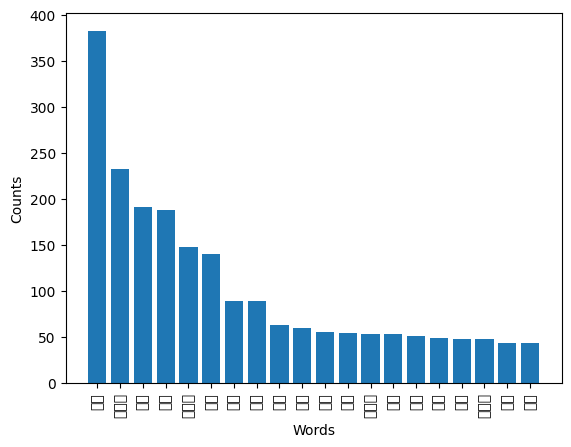

In [22]:
import matplotlib.pyplot as plt

# 단어와 빈도수 리스트에서 단어와 빈도수를 따로 추출
words = [word for word, count in word_features3]
counts = [count for word, count in word_features3]

# x축 눈금을 단어로, y축 눈금을 빈도수로 지정하여 그래프 그리기
plt.bar(words, counts)
plt.xticks(rotation=90)  # x축 눈금의 이름이 겹치지 않도록 90도 회전
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canv

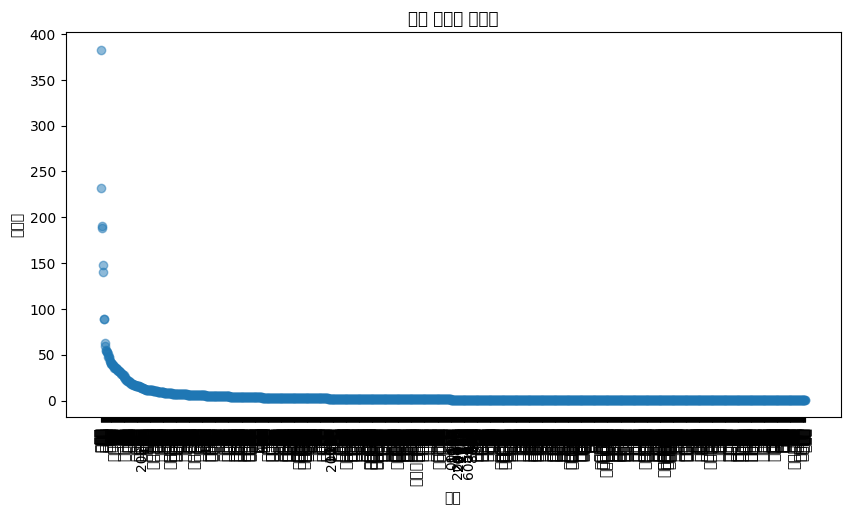

In [23]:
import matplotlib.pyplot as plt

# 단어와 빈도수 추출
words = [word for word, count in sorted_word_count3]
counts = [count for word, count in sorted_word_count3]

# x축, y축 설정
x = list(range(len(words)))
y = counts

# 그래프 그리기
plt.figure(figsize=(10,5))
plt.scatter(x, y, alpha=0.5)

# x축 눈금 설정
plt.xticks(x, words, rotation=90)

# 그래프 타이틀과 라벨 설정
plt.title("단어 빈도수 산점도")
plt.xlabel("단어")
plt.ylabel("빈도수")

plt.rc('xtick', labelsize=20)
plt.rc('axes', labelsize=2)

plt.show()

# 지프의 법칙이 확인된다. DTM으로 그래프를 만들면 아래와 같은 반비례 그래프가 만들어진다.
# "빈도순으로 1위인 단어는 2위 단어보다 두 배 더 자주 쓰이고, 3위 단어보다는 세 배 더 자주 쓰인다."

tfidf 적용하기

앞에서 만든 카운트 행렬(dtm1)을 재사용하기 위해 TfidfTransformer를 사용한 예

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()

dtm1_tfidf = transformer.fit_transform(dtm1)

print('#shape of tfidf matrix:', dtm1_tfidf.shape)
print('#tf-idf score of the first doc:', dtm1_tfidf[0].toarray()[0][:20])

#shape of tfidf matrix: (15, 1260)
#tf-idf score of the first doc: [0.         0.         0.         0.         0.05178206 0.
 0.         0.         0.         0.044964   0.         0.
 0.         0.         0.         0.05178206 0.05178206 0.10356412
 0.         0.        ]


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

tf = TfidfVectorizer()
tf.fit(corpus1)  # corpus1을 이용하여 tfidf 모델 학습? fit은 특성집합을 생성하는 메서드인데.

start = len(corpus1[0]) // 2
source = corpus1[0][-start:]

source_tf = tf.transform([source])  # 입력 문서를 tfidf 행렬로 변환
sim_result_tf = cosine_similarity(source_tf, dtm1_tfidf)  # 유사도 계산

print('#가장 유사한 리뷰의 인덱스 :', np.argmax(sim_result_tf[0]))

#가장 유사한 리뷰의 인덱스 : 0


카운트 벡터를 거치지 않고 바로 TF-IDF 행렬을 생성하는 예

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

tf = TfidfVectorizer()
dtm1_tf = tf.fit_transform(corpus1)
tf.fit(corpus1)  # corpus1을 이용하여 tfidf 모델 학습? fit은 특성집합을 생성하는 메서드인데.

start = len(corpus1[0]) // 2
source = corpus1[0][-start:]

source_tf = tf.transform([source])  # 입력 문서를 tfidf 행렬로 변환
sim_result_tf = cosine_similarity(source_tf, dtm1_tf)  # 유사도 계산

print('#가장 유사한 리뷰의 인덱스 :', np.argmax(sim_result_tf[0]))

#가장 유사한 리뷰의 인덱스 : 0


source에 새로운 글을 넣어보자.

In [55]:
document_path = input("작성한 글(파일)의 경로를 입력하여 주세요.")
print("입력된 경로는", document_path, "입니다.")

작성한 글(파일)의 경로를 입력하여 주세요./content/good/2113 임기영.txt
입력된 경로는 /content/good/2113 임기영.txt 입니다.


In [56]:
with open(document_path, 'r', encoding='cp949') as file:
    document_content = file.read()

print("불러온 문서 내용은 다음과 같습니다:")
print(document_content)

불러온 문서 내용은 다음과 같습니다:
	자유롭게 이동할 권리를 달라는 장애인들의 외침과 출근길 비장애인들의 불편이 충돌했다. 이동권과 복지 예산의 보장을 주장하는 전국장애인차별철폐연대의 지하철 시위로 시민들의 발이 묶였고, 시위에 대한 찬반 여론이 뜨거웠다. 대부분의 언론과 시민들은 부적절한 시위 방식을 문제 삼았다. 그런데 전동차에 기어오르면서까지 그들이 얘기하고 싶었던 것은 무엇이었을까? ‘욕의 무덤’에 들어가서라도 찾고 싶은 최소한의 권리를, 방법만을 문제 삼으며 외면해서는 안 된다. 
	장애인들의 외침은 합당하다. 장애인 권리 보장 계획과 함께 예산을 마련하라는 것이다. 헌법은 장애인의 인권에 대해 소극적으로 밝히고 있기에, 구체적인 법률과 예산이 반드시 명시돼야 한다. 지금껏 정부는 정권이 바뀔 때마다 장애인 이동권을 위한 계획을 내놓았지만 미이행하거나 불완전한 실행에 그쳤다. 국내에서 장애인들이 비장애인들과 함께 교통수단을 이용하고 필요시 특별수단을 자유롭게 이용할 수 있는 자치 단체는 전무하다. 
 장애인의 이동권 보장 없이는 다른 기본권의 보장 역시 장담할 수 없다. 그러나 안타깝게도 지금의 국회는 ‘교통약자의 이동편의증진법 개정안’을 통과시키고도 예산배정은 명시하지 않았다. 
	전장연이 출근 시간대 지하철에서 시위를 벌인 것은 더 많은 사람들에게 이동권을 외치기 위한 불가피한 선택이었다. 1인 시위에 침묵하던 언론이 지하철 시위에는 꽤 많은 지면을 할애하지 않았는가? 그러나 적지 않은 사람들이 정부에 해야 할 소리를 시민들을 볼모로 삼아 했다며 비판했다. 시민들의 불편에 국가의 책임은 없을까? 전장연은 시위를 사전 예고하며 양해를 구했다. 교통공사는 업무방해 고소장을 낼 것이 아니라, 예고된 시위를 적극적으로 알리고 불편을 최소화할 대책을 찾았어야 한다. 전장연의 성급함이 없지 않았고, 일부 장애인들의 무질서하거나, 의도적이고 과격한 행위가 있었던 것은 사실이다. 하지만, 일부의 행동을 문제 삼아 ‘나쁜 장애인 프레임’ 안에 본질을 가둬서는 안

입력된 글과 저장된 글의 코사인 유사도 비교

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# '상'에 해당하는 글과의 비교 

tf = TfidfVectorizer()
dtm1_tf = tf.fit_transform(corpus1)
tf.fit(corpus1)  # corpus1을 이용하여 tfidf 모델 학습? fit은 특성집합을 생성하는 메서드인데.

source = document_content

source_tf = tf.transform([source])  # 입력 문서를 tfidf 행렬로 변환
sim_result_tf = cosine_similarity(source_tf, dtm1_tf)  # 유사도 계산

print('#가장 유사한 리뷰의 인덱스 :', np.argmax(sim_result_tf[0]))
print(sim_result_tf.shape)
print((-sim_result_tf[0]).argsort())
print("유사도 계산 결과 역순 정렬 :", sorted(sim_result_tf[0], reverse=True))

#가장 유사한 리뷰의 인덱스 : 1
(1, 15)
[ 1  8  0  7  9  6  2 13 12 10  4 14 11  3  5]
유사도 계산 결과 역순 정렬 : [0.4396655871630988, 0.2513810070452165, 0.1962660314686757, 0.18472875275079068, 0.1683129612975443, 0.1620565112957911, 0.15601025810151176, 0.15120477322385914, 0.1478661147572566, 0.1447373496017691, 0.14059662626313457, 0.14043863890957606, 0.1298673868791667, 0.10913051430872117, 0.10210028257097006]


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# '중'에 해당하는 글과의 비교 

tf = TfidfVectorizer()
dtm2_tf = tf.fit_transform(corpus2)
tf.fit(corpus2)  # corpus1을 이용하여 tfidf 모델 학습? fit은 특성집합을 생성하는 메서드인데.

source = document_content

source_tf = tf.transform([source])  # 입력 문서를 tfidf 행렬로 변환
sim_result_tf = cosine_similarity(source_tf, dtm2_tf)  # 유사도 계산

print('#가장 유사한 리뷰의 인덱스 :', np.argmax(sim_result_tf[0]))
print(sim_result_tf.shape)
print((-sim_result_tf[0]).argsort())
print("유사도 계산 결과 역순 정렬 :", sorted(sim_result_tf[0], reverse=True))

#가장 유사한 리뷰의 인덱스 : 20
(1, 24)
[20 10 21 12  5  8 23 22 16  9  7 11  6 18  4  0 17 19  3 14 13  2 15  1]
유사도 계산 결과 역순 정렬 : [0.30249833663961867, 0.2834507006413421, 0.2661765102171807, 0.2536313934941649, 0.2469521374854873, 0.23495070430940918, 0.23285110783715635, 0.22688149514885678, 0.2221238195575046, 0.21916461181037794, 0.21905824982625693, 0.21304069624443792, 0.2058845676940289, 0.19616843628817193, 0.18899013067478, 0.18651612246299865, 0.1807634918909081, 0.17557090411176848, 0.17484958826130373, 0.1586733873325624, 0.15498913901761185, 0.1464176726647944, 0.12323179039209686, 0.11064352828565242]


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# '하'에 해당하는 글과의 비교 

tf = TfidfVectorizer()
dtm3_tf = tf.fit_transform(corpus3)
tf.fit(corpus3)  # corpus1을 이용하여 tfidf 모델 학습? fit은 특성집합을 생성하는 메서드인데.

source = document_content

source_tf = tf.transform([source])  # 입력 문서를 tfidf 행렬로 변환
sim_result_tf = cosine_similarity(source_tf, dtm3_tf)  # 유사도 계산

print('#가장 유사한 리뷰의 인덱스 :', np.argmax(sim_result_tf[0]))
print(sim_result_tf.shape)
print((-sim_result_tf[0]).argsort())
print("유사도 계산 결과 역순 정렬 :", sorted(sim_result_tf[0], reverse=True))

#가장 유사한 리뷰의 인덱스 : 4
(1, 21)
[ 4  5 20 12  8  7 14 19 15  9  2 18  6 13  1 10 16  3 11  0 17]
유사도 계산 결과 역순 정렬 : [0.27641061291537966, 0.2689630613593061, 0.24081979195942313, 0.23282374599869834, 0.22784795706434052, 0.22431799960330787, 0.21973597011209622, 0.20699207477137482, 0.20634474886176096, 0.20276541947291965, 0.19247550755866355, 0.18978096936057182, 0.18956627448018218, 0.18709511874551055, 0.1846057219889117, 0.18224812728292927, 0.1690897000653037, 0.16836248429743195, 0.16043460005420188, 0.15508219860898392, 0.1500369430395591]
